In [53]:
import config
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
conn = psycopg2.connect(
    host=config.HOST,
    database=config.DATABASE,
    user=config.USER,
    password=config.PASSWORD,
    port=config.PORT)

In [55]:
cur = conn.cursor()

print('PostgreSQL database version:')
cur.execute('SELECT version()')

PostgreSQL database version:


In [56]:
db_version = cur.fetchone()
print(db_version)

('PostgreSQL 12.5 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',)


In [57]:
sqlQuery = 'SELECT d.ranking, d.countryorregion, d.score, d.perceptionofcorruption, cpi.cpi_score, cpi.rank FROM data_2019 as d INNER JOIN "countryCPI" as cpi ON d.countryorregion = cpi.country WHERE cpi.year = 2019'

In [58]:
cur.execute(sqlQuery)

In [59]:
data = cur.fetchall()

In [60]:
framedData = pd.DataFrame(np.array(data))

In [61]:
conn.close()

In [72]:
print(framedData)

    Happiness Ranking      Country Happiness Score  \
0                   2      Denmark             7.6   
1                   8  New Zealand           7.307   
2                   1      Finland           7.769   
3                  34    Singapore           6.262   
4                   7       Sweden           7.343   
..                ...          ...             ...   
142               108    Venezuela           4.707   
143               151        Yemen            3.38   
144               149        Syria           3.462   
145               112      Somalia           4.668   
146               156  South Sudan           2.853   

    Corruption Perception Score CPI Score CPI Ranking  
0                          0.41        87           1  
1                          0.38        87           1  
2                         0.393        86           3  
3                         0.453        85           4  
4                         0.373        85           4  
..             

In [63]:
framedData.columns = ['Happiness Ranking', 'Country', 'Happiness Score', 'Corruption Perception Score', 'CPI Score', 'CPI Ranking']

In [64]:
print(framedData.head())

  Happiness Ranking      Country Happiness Score Corruption Perception Score  \
0                 2      Denmark             7.6                        0.41   
1                 8  New Zealand           7.307                        0.38   
2                 1      Finland           7.769                       0.393   
3                34    Singapore           6.262                       0.453   
4                 7       Sweden           7.343                       0.373   

  CPI Score CPI Ranking  
0        87           1  
1        87           1  
2        86           3  
3        85           4  
4        85           4  


In [77]:
framedData.dtypes

Happiness Ranking              object
Country                        object
Happiness Score                object
Corruption Perception Score    object
CPI Score                      object
CPI Ranking                    object
dtype: object

In [79]:
framedData['Happiness Ranking'] = pd.to_numeric(framedData['Happiness Ranking'])

In [80]:
framedData['Happiness Score'] = pd.to_numeric(framedData['Happiness Score'])

In [81]:
framedData['Corruption Perception Score'] = pd.to_numeric(framedData['Corruption Perception Score'])

In [82]:
framedData['CPI Score'] = pd.to_numeric(framedData['CPI Score'])

In [83]:
framedData['CPI Ranking'] = pd.to_numeric(framedData['CPI Ranking'])

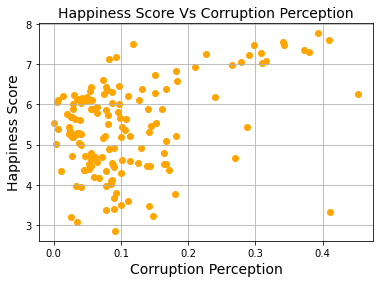

In [84]:
plt.scatter(framedData['Corruption Perception Score'], framedData['Happiness Score'], color='orange')
plt.title('Happiness Score Vs Corruption Perception', fontsize=14)
plt.xlabel('Corruption Perception', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)

plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)

plt.show()

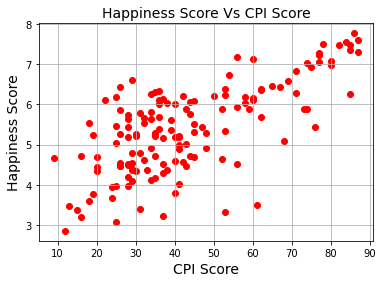

In [86]:
plt.scatter(framedData['CPI Score'], framedData['Happiness Score'], color='red')
plt.title('Happiness Score Vs CPI Score', fontsize=14)
plt.xlabel('CPI Score', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)
plt.show()